In [1]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stops=set(stopwords.words('english'))
punctuations=list(string.punctuation)
stops.update(punctuations)

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
!unzip /content/drive/MyDrive/text_classification.zip -d text_classification

Streaming output truncated to the last 5000 lines.
  inflating: text_classification/text classification/20_newsgroups-20230822T171546Z-001/20_newsgroups/soc.religion.christian/20362  
  inflating: text_classification/text classification/20_newsgroups-20230822T171546Z-001/20_newsgroups/soc.religion.christian/20363  
  inflating: text_classification/text classification/20_newsgroups-20230822T171546Z-001/20_newsgroups/soc.religion.christian/20364  
  inflating: text_classification/text classification/20_newsgroups-20230822T171546Z-001/20_newsgroups/soc.religion.christian/20365  
  inflating: text_classification/text classification/20_newsgroups-20230822T171546Z-001/20_newsgroups/soc.religion.christian/20487  
  inflating: text_classification/text classification/20_newsgroups-20230822T171546Z-001/20_newsgroups/soc.religion.christian/20488  
  inflating: text_classification/text classification/20_newsgroups-20230822T171546Z-001/20_newsgroups/soc.religion.christian/20489  
  inflating: text_

In [7]:
#Our data is in a folder named 20_newsgroups , which contains 20 different folders corresponding to each news category
#and each folder contains large number of news articles

# We first extract name of each folder so that we can easily specify the path to the text file
import glob
import os

path=r"/content/text_classification/text classification/20_newsgroups-20230822T171546Z-001/20_newsgroups"

os.chdir(path)
news20 = glob.glob('*') # we get the names of all 20 folders

Listofarticles=[]
categoryofarticle=[]
news20

['talk.politics.misc',
 'rec.sport.hockey',
 'misc.forsale',
 'rec.sport.baseball',
 'talk.politics.guns',
 'sci.med',
 'comp.graphics',
 'comp.sys.mac.hardware',
 'comp.sys.ibm.pc.hardware',
 'comp.os.ms-windows.misc',
 'comp.windows.x',
 'sci.crypt',
 'talk.politics.mideast',
 'alt.atheism',
 'rec.motorcycles',
 'sci.electronics',
 'rec.autos',
 'talk.religion.misc',
 'soc.religion.christian',
 'sci.space']

In [8]:
i=0
import time

# store starting time
begin = time.time()
i=1
for news in news20:
    os.chdir(path + "/" + news)
    current_folder = glob.glob('*')
    print("Folder name ",news,"    " , "Number of articles", len(current_folder))
    for articles in current_folder:
        categoryofarticle.append(i)
        file_obj = open(path+"/"+ news + "/" + articles,encoding='latin-1' )
        file_data = file_obj.read()
        Listofarticles.append(file_data)
    i+=1
#stores end time
end = time.time()

print("Time took for process" , end -begin)



Folder name  talk.politics.misc      Number of articles 1000
Folder name  rec.sport.hockey      Number of articles 1000
Folder name  misc.forsale      Number of articles 1000
Folder name  rec.sport.baseball      Number of articles 1000
Folder name  talk.politics.guns      Number of articles 1000
Folder name  sci.med      Number of articles 1000
Folder name  comp.graphics      Number of articles 1010
Folder name  comp.sys.mac.hardware      Number of articles 1000
Folder name  comp.sys.ibm.pc.hardware      Number of articles 1000
Folder name  comp.os.ms-windows.misc      Number of articles 1000
Folder name  comp.windows.x      Number of articles 1000
Folder name  sci.crypt      Number of articles 1000
Folder name  talk.politics.mideast      Number of articles 1000
Folder name  alt.atheism      Number of articles 1000
Folder name  rec.motorcycles      Number of articles 1010
Folder name  sci.electronics      Number of articles 1000
Folder name  rec.autos      Number of articles 1000
Folde

In [9]:
print(len(Listofarticles))

20017


In [17]:
type(Listofarticles)

list

In [10]:
tokenized_articles=[word_tokenize(ele) for ele in Listofarticles ]

In [18]:
type(tokenized_articles[0])

list

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB

traindoc, testdoc, traincategory, testcategory=train_test_split(tokenized_articles, categoryofarticle, random_state=1)

In [19]:
allwords=[]

# dont't include words with length 1 and 2
# and they might either be the stops which are not there in "stops" variable or some punctuation marks which are
# not there in "punctuations" variable. apart from the words of length 1 and 2 i have also removed some words
# separately because these words are most probably present in all the documents so they are not helping us much in
# classification.

for doc in traindoc:
    for word in doc:
        if (word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!="n't" and word[0]!=".":
            allwords.append(word)

len(allwords)


2827729

In [21]:
#This function accepts a list and returns a dictionary in which keys are the particular words in the list and values are
# the frequency of that element in that list.
def freq_dict(all_words):
    dic=dict()
    #it iterates through all the elements in the list and increases the frequency by one if it encounters the same element again.
    for word in all_words:
        if word in dic.keys():
            dic[word]+=1
        else:
            dic[word]=1
    return dic

dic=freq_dict(allwords)
#Now in the "dic" variable we have the frequencies of all the elements of the list "all words".

In [22]:
import numpy as np
#I have imported numpy because my plan is to get the elements in dic.keys() and dic.values() to two separate variables
# namely "freq" and "words". and then i will arrange them in a decreasing fashion of frequency.
freq=np.array([i for i in dic.values()])
words=np.array([i for i in dic.keys()])

In [23]:
words=words[np.argsort(freq)][::-1]
freq=np.sort(freq)[::-1]
#now i have sorted both the arrays and first arranged them in ascending order using np.sort() and np.argsort() and then i have
# reversed the so obtained array to get a descending ordered array.

In [27]:
words[0:20]
freq[0:20]


array([19570, 15495, 15225, 15149, 15076, 15071, 15061, 14722, 14533,
       13338, 12295, 11153, 10996, 10104,  9423,  9282,  8205,  8163,
        7355,  7350])

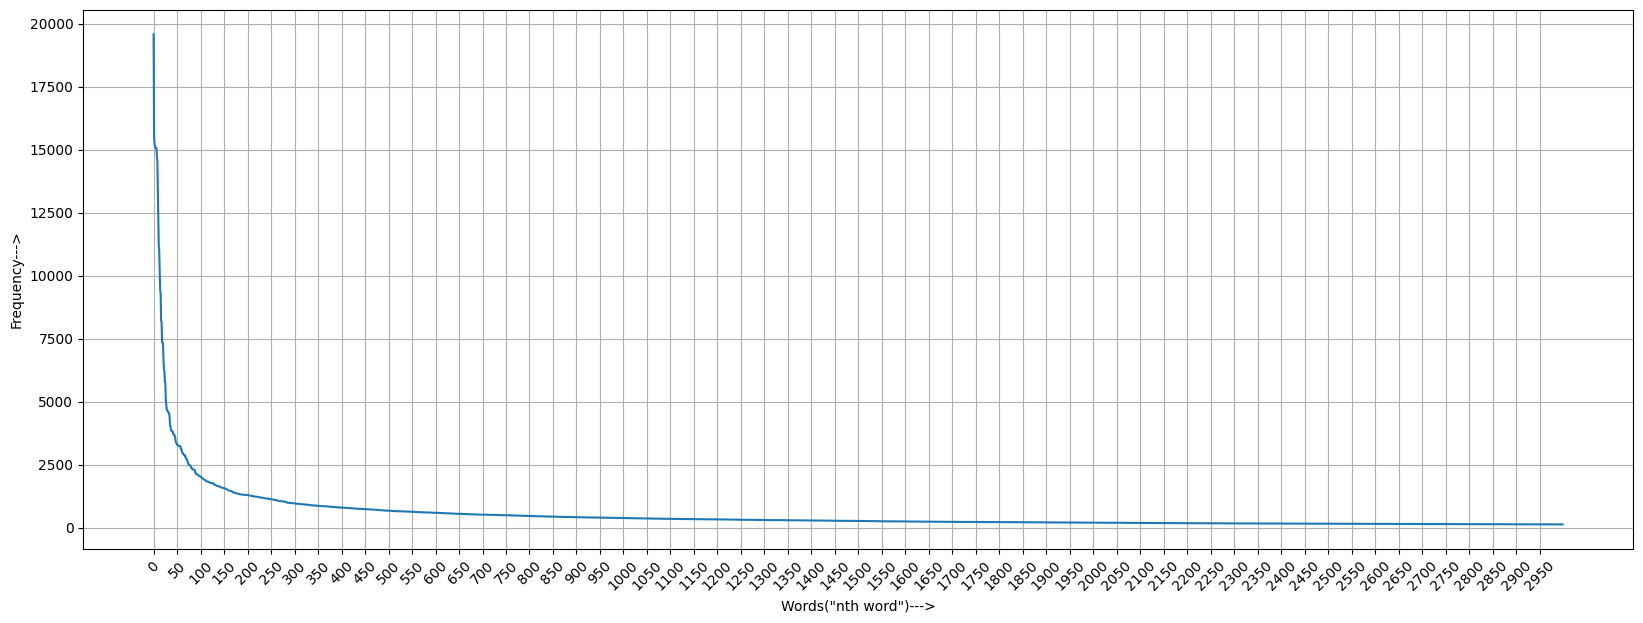

In [24]:
#This cell draws a frequency distribution graph for us to from where we can carefully observe the frequency trend of out list.
import matplotlib.pyplot as plt
#following are the limits for our graph.
lower_limit=0    #default
upper_limit=3000    #default
difference_between_each_xtick=50  #default value. change these values to observe the graph in more depth
#adjusting size of the graph for more clearity.
plt.figure(figsize=(20, 7))
#plotting
plt.plot(np.arange(len(freq))[lower_limit:upper_limit], freq[lower_limit:upper_limit])
#labelling
plt.xlabel('Words("nth word")--->')
plt.ylabel("Frequency--->")
#adjusting the xticks
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()
#observe the following graph by changing the values of lower_limit, upper_limit and difference_between_each_xtick.

In [28]:
features=words[50:4000]
len(features)

3950

In [31]:
len(words)

264512

In [32]:
# This function is the backbone of our Text Classification.
# It takes the patameters x_train or x_test and the list of all features and converts it into a TEXT-CLASSIFICATION-FRIENDLY structure.
# By text-classification-friendly, I mean it converts the data into a 2-D array which contains the frequency of that feature
# in that perticular document. where rows are the documents and columns are the features.
def data_modifier(x_data, features):
    modified_data=np.zeros((len(x_data), len(features)))
    #modified_data currently have a ZEROS numpy array whose shape is (len(x_data), len(features))
    count=0
    #Ignore this "Count" variable. i have created it just to keep an eye on the progress of our algorithm.
    max_count=len(x_data)
    for i in range(len(x_data)):
        #looping over each and every row in the x_data
        current_doc=x_data[i]
        #current_doc contains the current document on which we are iterating.(As the name suggests obviously)
        d=dict()
        #this dictionary contains the frequency of all the elements in our current_doc.
        for word in current_doc:
            if word in d.keys():
                d[word]+=1
            else:
                d[word]=1
        #dictionary created
        for j in range(len(features)):
            #now for each feature in features we will insert the value of the dictionary for the corresponding. that is,
            #the frequency of each feature in that current document.
            if features[j] in d.keys():
                modified_data[i][j]=d[features[j]]
            else:
                #if the current feature is not in the dictionary, it will remain 0 in the modified_data 2D matrix
                continue
        count+=1
        print("progress: ", (count*100)/max_count, "%")
        #This statement just prints the progress of our data_modifier function.
    #finally I have returned the modified array.
    return modified_data
#this function takes some time to process because i have considered nearly 3000 features and apart from that we have so many
#documents which contains so many words. so the algorithm has to go through each word in features list for each word in a perticular
#document. and this needs to be done because I think there is probably no other way to create such a modified array from x_data.

In [33]:
train_doc_modified = data_modifier(traindoc, features)

Streaming output truncated to the last 5000 lines.
progress:  66.69997335464961 %
progress:  66.7066346922462 %
progress:  66.7132960298428 %
progress:  66.71995736743938 %
progress:  66.72661870503597 %
progress:  66.73328004263256 %
progress:  66.73994138022915 %
progress:  66.74660271782574 %
progress:  66.75326405542233 %
progress:  66.75992539301892 %
progress:  66.7665867306155 %
progress:  66.7732480682121 %
progress:  66.77990940580868 %
progress:  66.78657074340528 %
progress:  66.79323208100186 %
progress:  66.79989341859846 %
progress:  66.80655475619504 %
progress:  66.81321609379164 %
progress:  66.81987743138822 %
progress:  66.82653876898482 %
progress:  66.8332001065814 %
progress:  66.83986144417798 %
progress:  66.84652278177458 %
progress:  66.85318411937116 %
progress:  66.85984545696776 %
progress:  66.86650679456434 %
progress:  66.87316813216094 %
progress:  66.87982946975752 %
progress:  66.88649080735412 %
progress:  66.8931521449507 %
progress:  66.89981348254

In [34]:
test_doc_modified = data_modifier(testdoc, features)

Streaming output truncated to the last 5000 lines.
progress:  0.11988011988011989 %
progress:  0.13986013986013987 %
progress:  0.15984015984015984 %
progress:  0.1798201798201798 %
progress:  0.1998001998001998 %
progress:  0.21978021978021978 %
progress:  0.23976023976023977 %
progress:  0.2597402597402597 %
progress:  0.27972027972027974 %
progress:  0.2997002997002997 %
progress:  0.3196803196803197 %
progress:  0.33966033966033965 %
progress:  0.3596403596403596 %
progress:  0.37962037962037964 %
progress:  0.3996003996003996 %
progress:  0.4195804195804196 %
progress:  0.43956043956043955 %
progress:  0.4595404595404595 %
progress:  0.47952047952047955 %
progress:  0.4995004995004995 %
progress:  0.5194805194805194 %
progress:  0.5394605394605395 %
progress:  0.5594405594405595 %
progress:  0.5794205794205795 %
progress:  0.5994005994005994 %
progress:  0.6193806193806194 %
progress:  0.6393606393606394 %
progress:  0.6593406593406593 %
progress:  0.6793206793206793 %
progress:  

In [35]:
#first trying out the inbuilt Multinomial naive bayes classifier.
clf=MultinomialNB()
clf.fit(train_doc_modified, traincategory)
clf.score(test_doc_modified, testcategory)
#it seems like a descent score to me beacause we haven't used real text classification algorithms like NLP and all.
#If you want a the best possible accuracy, increase the number of features in the 13th cell to around 50,000.
#you will get nearly 90 percent of accuracy.but i do not recommend it as the 49999th element will have the frequency of just 2.
#and such a feature won't help us much for the classification.

0.8829170829170829

In [36]:
y_pred=clf.predict(test_doc_modified)

In [37]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(train_doc_modified, traincategory)

MultinomialNB()

In [38]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_doc_modified)

print(classification_report(testcategory, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.75      0.76       261
           2       0.98      0.96      0.97       248
           3       0.82      0.94      0.88       254
           4       0.97      0.95      0.96       260
           5       0.82      0.89      0.85       266
           6       0.98      0.93      0.95       265
           7       0.82      0.85      0.83       247
           8       0.87      0.90      0.89       227
           9       0.81      0.85      0.83       288
          10       0.94      0.74      0.83       235
          11       0.90      0.91      0.91       246
          12       0.96      0.95      0.96       257
          13       0.95      0.90      0.93       235
          14       0.75      0.87      0.81       239
          15       0.94      0.95      0.94       249
          16       0.89      0.86      0.88       257
          17       0.89      0.94      0.91       240
          18       0.71    

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN model
knn_model = KNeighborsClassifier(n_neighbors=120)  # 'n_neighbors' specifies the number of neighbors to consider

# Train the model
knn_model.fit(train_doc_modified, traincategory)

KNeighborsClassifier(n_neighbors=120)

In [48]:
from sklearn.metrics import classification_report

y_pred = knn_model.predict(test_doc_modified)

print(classification_report(testcategory, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.18      0.30       261
           2       0.99      0.48      0.65       248
           3       0.14      1.00      0.25       254
           4       0.52      0.95      0.67       260
           5       0.64      0.17      0.27       266
           6       0.91      0.47      0.62       265
           7       0.21      0.97      0.35       247
           8       0.95      0.15      0.27       227
           9       0.89      0.14      0.25       288
          10       0.86      0.46      0.60       235
          11       0.97      0.44      0.61       246
          12       0.95      0.21      0.34       257
          13       0.98      0.39      0.56       235
          14       0.81      0.30      0.43       239
          15       0.97      0.45      0.62       249
          16       0.95      0.47      0.63       257
          17       0.94      0.28      0.43       240
          18       0.66    